# ΕΙΣΑΓΩΓΗ

Σέ αυτήν την εργαστηριακή άσκηση θα εξασκηθούμε στoν εντοπισμό αντικειμένων πάνω σε εικόνες  και την κατάτμηση εικόνων σε περιοχές με βάση τα χρωματικά χαρακτηριστικά. 

## ΕΡΩΤΗΜΑ 1

Εισαγωγή των απαραίτητων βιβλιοθηκών.

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import imutils
import random
from matplotlib import rcParams

In [88]:
image_path = 'Input\PythonPitStop.jpg'
template_path = 'Input\Pythonsymbol.png'

Διαβάζουμε και εμφανίζουμε  την εικόνα στην οποία θα εφαρμόσουμε την αναζήτηση του template.

In [89]:
#load the image to check
img_rgb = cv2.imread(image_path)
# img_rgb = cv2.imread('Input\opencv.jpg')
img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2GRAY)


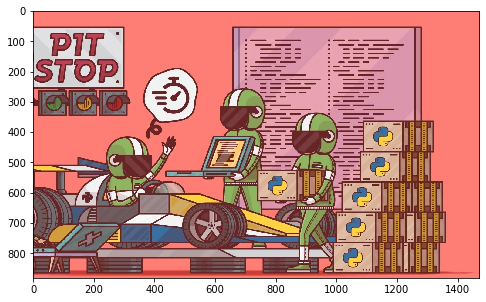

In [4]:
rcParams['figure.figsize'] = 8 ,8
plt.imshow(cv2.cvtColor(img_rgb, cv2.COLOR_BGR2RGB))

Διαβάζουμε και εμφανίζουμε  το αντικείμενο το οποίο θα αναζητήσουμε στην εικόνα.

In [90]:
template = cv2.imread(template_path, 0)

w,h  = template.shape[::-1]

In [91]:
template.shape[:]

(71, 73)

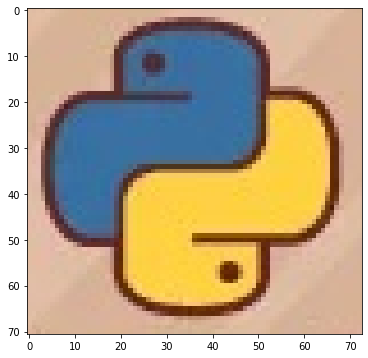

In [7]:
rcParams['figure.figsize'] = 6 ,6
plt.imshow(cv2.cvtColor(cv2.imread(template_path),
                        cv2.COLOR_BGR2RGB))

Δημιουργούμε μια συνάρτηση η οποία θα εφαρμόζει θόρυβο στην εικόνα με τυχαίο τρόπο.

In [92]:
#define function to create some noise to an image
def rand_noise(image, ammount):

    output = np.zeros(image.shape,np.uint8)
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            rdn = random.randint(0, 9)
            rdn2 = random.randint(0, 9)
            
            output[i][j] = image[i][j] + ammount*rdn*image[i][j] - ammount*rdn2*image[i][j]
    return output

Επειδή θέλουμε να δούμε πως ανταπεξέρχεται η συνάρτηση σε εικόνες με θόρυβο μαζεύουμε όλα τα βήματα με τα οποία εφαρμόζουμε την συνάρτηση cv2.matchTemplate στο παρακάτω function.

In [93]:
def templateMatching (img_rgb_, ammount, threshold= 0.72) :
    #run the templae matching
    img_noisy = rand_noise(img_rgb_, ammount)
    img_gray_noisy = cv2.cvtColor(img_noisy, cv2.COLOR_BGR2GRAY)
    res = cv2.matchTemplate(img_gray_noisy,template,cv2.TM_CCOEFF_NORMED)
    loc = np.where( res >= threshold)
    #mark the corresponding location(s)
    for pt in zip(*loc[::-1]):
        cv2.rectangle(img_noisy, pt, (pt[0] + w, pt[1] + h), (0,255,255), 2)
    cv2.imwrite('Output/Q1/DetectedWith_{}_Noise.jpg'.format(ammount), img_noisy)
    return img_noisy

# A 

Εφαρμόζουμε την συνάρτηση templateMatching με ποσοστό θορύβου 0%, 5%, 10%, 20%.

In [10]:
#load the image to check
img_rgb = cv2.imread(image_path)

rcParams['figure.figsize'] = 10 ,10

##  noise = 0%

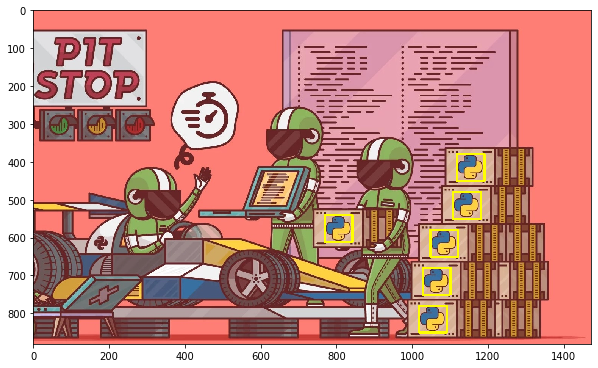

In [11]:
ammount = 0
img_rgb_0 = img_rgb.copy()
img_rgb_0 = templateMatching(img_rgb_0, ammount)
plt.imshow(cv2.cvtColor(img_rgb_0, cv2.COLOR_BGR2RGB))

Βλέπουμε ότι χωρίς καθόλου θόρυβο και με threshold 72% καταφέραμε και βρήκαμε τα 6 σημεία στα οποία εμφανίζεται το template.

## noise = 5%

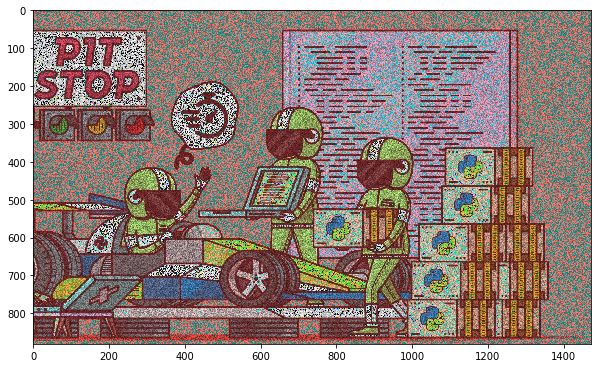

In [94]:
ammount = 0.05
img_rgb_5 = img_rgb.copy()
img_rgb_5 = templateMatching(img_rgb_5, ammount)
plt.imshow(cv2.cvtColor(img_rgb_5, cv2.COLOR_BGR2RGB))

Βλέπουμε ότι με 5% θόρυβο η εικόνα έχει αλλοιωθει αισθητά. Με threshold 72% ο αλγόριθμος δεν κατάφερε να αναγνωρίσει το templete.
Πάμε λοιπόν να δούμε μήπως βελτιωθούν τα πράγματα αν μειώσουμε το threshold.

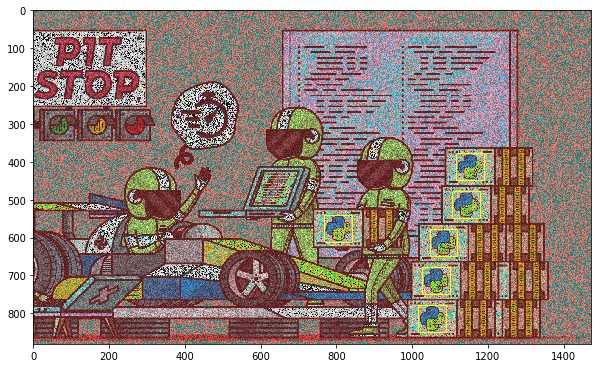

In [96]:
img_rgb_5 = img_rgb.copy()
img_rgb_5 = templateMatching(img_rgb_5, ammount, 0.68)
plt.imshow(cv2.cvtColor(img_rgb_5, cv2.COLOR_BGR2RGB))

Το μόνο που χρειαζόταν είναι να μειώσουμε το threshold κατά 4%.

## noise = 10%

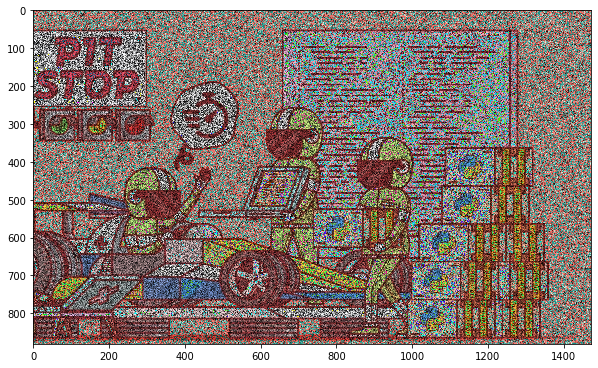

In [14]:
ammount = 0.10
img_rgb_10 = img_rgb.copy()
img_rgb_10 = templateMatching(img_rgb_10, ammount)
plt.imshow(cv2.cvtColor(img_rgb_10, cv2.COLOR_BGR2RGB))

Με threshold 72% δεν βρήκαμε κανένα σημείο.

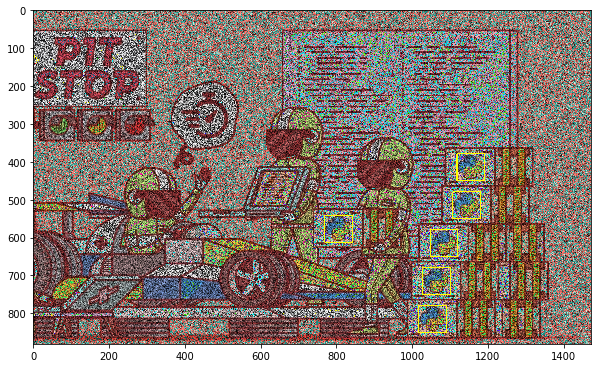

In [15]:
img_rgb_10 = img_rgb.copy()
img_rgb_10 = templateMatching(img_rgb_10, ammount, 0.40)
plt.imshow(cv2.cvtColor(img_rgb_10, cv2.COLOR_BGR2RGB))

Με 40% ομοιότητα ο αλγόριθμος κατάφερε να βρει και τα 6 σημεία.

## noise = 20%

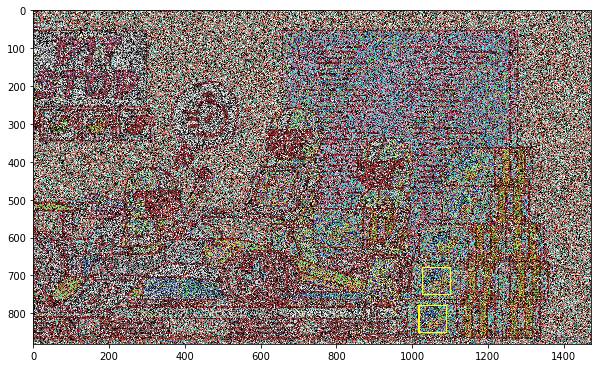

In [16]:
ammount = 0.20
img_rgb_20 = img_rgb.copy()
img_rgb_20 = templateMatching(img_rgb_20, ammount, 0.20)
plt.imshow(cv2.cvtColor(img_rgb_20, cv2.COLOR_BGR2RGB))

Με 20% θόρυβο είναι δύσκολο ακόμα και για εμάς τους ίδιους να διακρίνουμε τα 6 σημεία παρόλα αυτά ο αλγόριθμος με 20% threshold κατάφερε να βρει 2 σημεία.

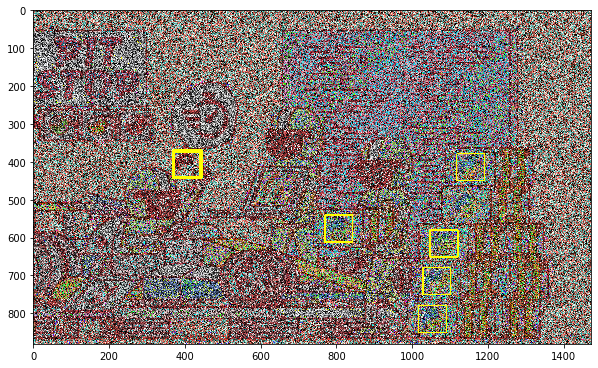

In [17]:
ammount = 0.20
img_rgb_20 = img_rgb.copy()
img_rgb_20 = templateMatching(img_rgb_20, ammount, 0.18)
plt.imshow(cv2.cvtColor(img_rgb_20, cv2.COLOR_BGR2RGB))

Με 18% threshold ο αλγόριθμος κατάφερε να βρει τα 5 απο τα 6 σημεία και αρκετά αλλα σημεία εσφαλμένα. 

Ποια από τις δυο υλοποίησης είναι καλύτερη έχει να κάνει με το εκάστοτε πρόβλημα, εάν εμείς στο σύστημα μας δεν θέλουμε κανένα false-positive τότε δεν θα μειώσουμε το threshold περισσότερο από 20% (μιλώντας για το συγκεκριμένο παράδειγμα).

## B

Σε αυτό το σημείο θα προσπαθήσουμε να εφαρμόσουμε γκαουσιανό φίλτρο για την εξομαλυμένη του θορύβου πριν εφαρμόσουμε τον αλγόριθμο.

In [18]:
#load the image to check
img_rgb = cv2.imread(image_path)

Προσθέτουμε το επιπλέον βήμα στην συνάρτηση templateMatching2.

In [19]:
def templateMatching2 (img_rgb_, ammount, threshold = 0.72) :
    #run the templae matching
    img_noisy = rand_noise(img_rgb_, ammount)
    img_gray_noisy = cv2.cvtColor(img_noisy, cv2.COLOR_BGR2GRAY)
    #b. gaussian filter
    img_filtered = cv2.GaussianBlur(img_noisy, (5,5), 0)
    img_gray_filtered = cv2.GaussianBlur(img_gray_noisy, (5,5), 0)
    res = cv2.matchTemplate(img_gray_filtered,template,cv2.TM_CCOEFF_NORMED)
    
    loc = np.where( res >= threshold)
    #mark the corresponding location(s)
    for pt in zip(*loc[::-1]):
        cv2.rectangle(img_filtered, pt, (pt[0] + w, pt[1] + h), (0,255,255), 2)
    cv2.imwrite('Output/Q1/DetectedWith_{}_Noise.jpg'.format(ammount), img_rgb) 
    return img_filtered

### 5%

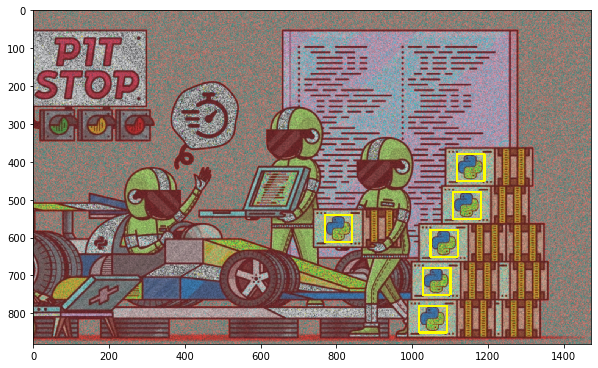

In [20]:
ammount = 0.05
img_rgb_5 = img_rgb.copy()
img_rgb_5= templateMatching2(img_rgb_5, ammount)
plt.imshow(cv2.cvtColor(img_rgb_5, cv2.COLOR_BGR2RGB))

## 10%

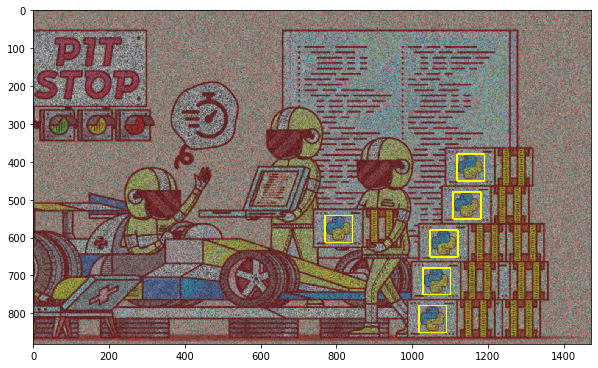

In [21]:
ammount = 0.10
img_rgb_10 = img_rgb.copy()
img_rgb_10 = templateMatching2(img_rgb_10, ammount)
plt.imshow(cv2.cvtColor(img_rgb_10, cv2.COLOR_BGR2RGB))

Παρατηρούμε εδώ ότι δεν χρειάζεται να ρίξουμε το threshold κάτω από 72%.

## 20%

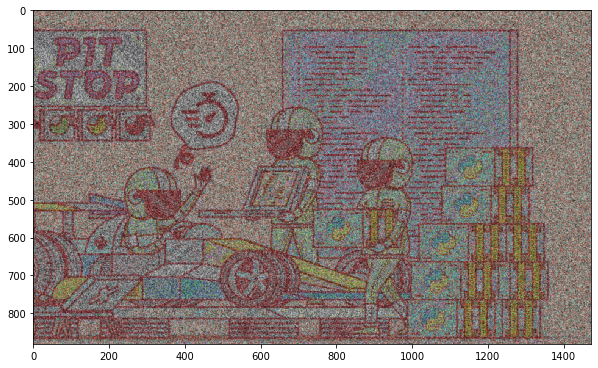

In [22]:
ammount = 0.20
img_rgb_20 = img_rgb.copy()
img_rgb_20 = templateMatching2(img_rgb_20, ammount)
plt.imshow(cv2.cvtColor(img_rgb_20, cv2.COLOR_BGR2RGB))

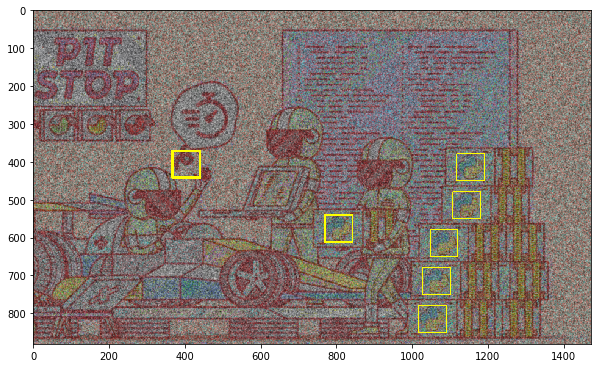

In [23]:
ammount = 0.20
img_rgb_20 = img_rgb.copy()
img_rgb_20 = templateMatching2(img_rgb_20, ammount, 0.47)
plt.imshow(cv2.cvtColor(img_rgb_20, cv2.COLOR_BGR2RGB))

Σε αυτό το σημείο παρατηρούμε ότι ακόμα και με 47% threshold ο αλγόριθμος είναι σε θέση να αναγνωρίσει όλα τα  σημεία ενώ θυμίζουμε ότι στο ερώτημα Α στο αντίστοιχο σημείο για να πάρουμε 5 από τα 6  αποτελέσματα  έπρεπε να ρίξουμε το threshold στο 20%.

# Part 2

θα προσπαθήσουμε να κάνουμε την δικιά μας υλοποίηση templete matching εφαρμόζοντας ένα sliding window στην εικόνα η οποία είναι προς αναζήτηση. Για κάθε παράθυρο που παίρνουμε θα συγκρίνουμε τα ιστογράμματα του παραθύρου και του template το οποίο ψάχνουμε, θα ορίσουμε ένα threshold το οποίο θα ορίζει ποτέ θα θεωρούμε ότι έχουμε matching.

Οι δυο μέθοδοι σύγκρισης που θα χρησιμοποιήσουμε είναι: **Correletion**, **Intersection** .

In [24]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import imutils
import random
from matplotlib import rcParams

In [25]:
import time
import skimage.measure

Συνάρτηση με την οποία θα μπορέσουμε να σαρώσουμε την εικόνα.

In [26]:
def sliding_window(image, stepSize, windowSize):
    
    for y in range(0, image.shape[0], stepSize):
        for x in range(0, image.shape[1], stepSize):
            # yield the current window
            yield (x, y, image[y:y + windowSize[1], x:x + windowSize[0]])

Διαβάζουμε την εικόνα που θα σαρώσουμε, τo templete το οποία θα βρίσκουμε στην εικόνα καθώς και υπολογίζουμε τις γραμμές και τις στήλες του templete.

In [27]:
# load the image and define the window width and height
image = cv2.imread('Input\PythonPitStop.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
#load the template image we look for
template = cv2.imread('Input\Python_symbol2.png')
template = cv2.cvtColor(template, cv2.COLOR_BGR2RGB)
# template = cv2.imread('Input\opencv-template.jpg',0)
(_, winW, winH) = template.shape[::-1]

Αυτήν την φορά θέλουμε να βρούμε το σύμβολο της python το οποίο είναι πίσω από τον οδηγό.

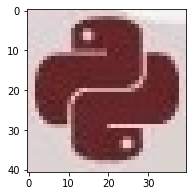

In [28]:
rcParams['figure.figsize'] = 3 ,3
plt.imshow(template)

In [29]:
rcParams['figure.figsize'] = 8 ,8


Παίρνουμε το ιστόγραμμα του templete ώστε να το συγκρίνουμε με το κάθε window  της εικόνας στην οποία γίνεται η αναζήτηση.

In [30]:
hist = cv2.calcHist([template], [0, 1, 2], None, [8, 8, 8],[0, 256, 0, 256, 0, 256])
hist_template = cv2.normalize(hist, hist).flatten()

Στον παρακάτω κωδικά εφαρμόζουμε το sliding window με βήμα 16 pixels στην εικόνα προς αναζήτηση. Χρησιμοποιούμε την cv2.compareHist με όρισμα την μέθοδο **correletion** για να συγκρίνουμε τα δυο ιστογράμματα. Σε περίπτωση που το αποτέλεσμα της σύγκρισης είναι μεγαλύτερο από το threshold τότε δημιουργούμε ένα bounding box σε εκείνο το σημείο.

**Με  κατώφλι  99% και μέθοδο Correlation.**

In [32]:
for (x, y, window) in sliding_window(image, stepSize=16, windowSize=(winW, winH)):
    # if the window does not meet our desired window size, ignore it
    if window.shape[0] != winH or window.shape[1] != winW:
            continue
    hist = cv2.calcHist([window], [0, 1, 2], None, [8, 8, 8],[0, 256, 0, 256, 0, 256])
    hist_window = cv2.normalize(hist, hist).flatten()
        
    d = cv2.compareHist(hist_template, hist_window, cv2.HISTCMP_CORREL)
    if (d > 0.99):
        print("match")
        cv2.rectangle(image, (x, y), (x + winW, y + winH), (0,255,255), 2)
            
    clone = image.copy()
    cv2.rectangle(clone, (x, y), (x + winW, y + winH), (0, 255, 0), 2)
    cv2.imshow("Window", clone)


    cv2.waitKey(1)
    time.sleep(0.025)
cv2.imwrite('Output/Q2/Detected_orreletion.jpg', image)
cv2.destroyWindow("Window")

match


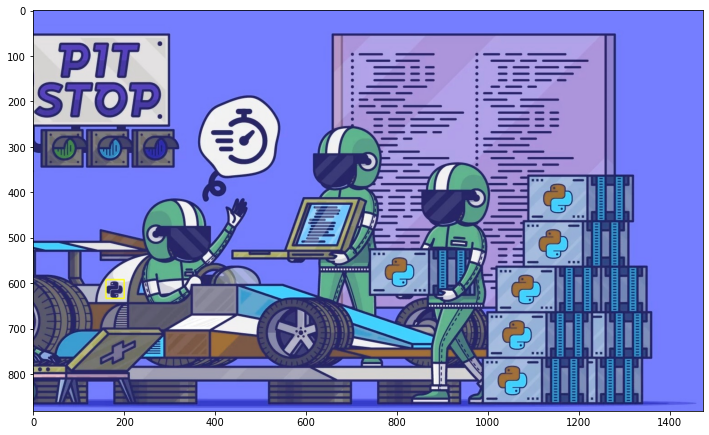

In [4]:
rcParams['figure.figsize'] = 12 ,12
result = cv2.imread('Output/Q2/Detected_orreletion.jpg')
plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))

Στον παρακάτω σύνδεσμο μπορείτε να δείτε μια αναπαράσταση του παραπάνω κωδικά:

https://gfycat.com/cavernousfrigidfinwhale

**Σε αυτό το σημείο εφαρμόζουμε την μέθοδο  Intersection με κατώφλι 2.**

In [33]:
# load the image and define the window width and height
image = cv2.imread('Input\PythonPitStop.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

In [34]:
for (x, y, window) in sliding_window(image, stepSize=16, windowSize=(winW, winH)):
    # if the window does not meet our desired window size, ignore it
    if window.shape[0] != winH or window.shape[1] != winW:
            continue
    hist = cv2.calcHist([window], [0, 1, 2], None, [8, 8, 8],[0, 256, 0, 256, 0, 256])
    hist_window = cv2.normalize(hist, hist).flatten()
        
    d = cv2.compareHist(hist_template, hist_window, cv2.HISTCMP_INTERSECT)
    if (d >= 2):
        print("match", d)
        cv2.rectangle(image, (x, y), (x + winW, y + winH), (0,255,255), 2)
            
    clone = image.copy()
    cv2.rectangle(clone, (x, y), (x + winW, y + winH), (0, 255, 0), 2)
    cv2.imshow("Window", clone)


    cv2.waitKey(1)
    time.sleep(0.025)
cv2.imwrite('Output/Q2/Intersection.jpg', image)
cv2.destroyWindow("Window")

match 2.008130749920383
match 2.1664392829407007


Όπως βλέπουμε από την εικόνα παρακάτω με αυτό το κατώφλι βρήκαμε δυο σημεία τα οποία μοιάζουν άλλα μόνο το δεύτερο είναι το σωστό.

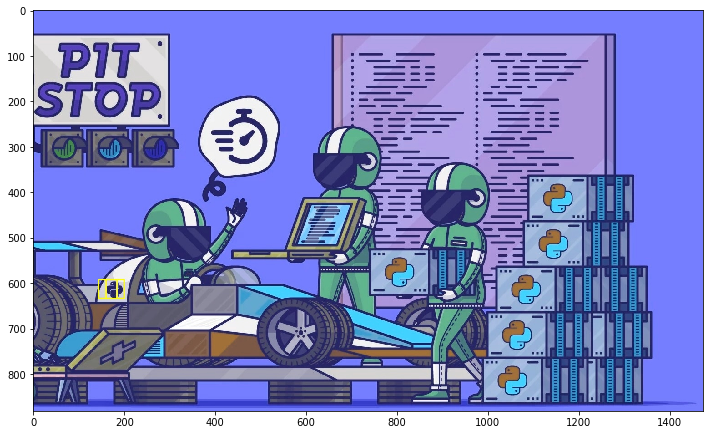

In [35]:
rcParams['figure.figsize'] = 12 ,12
result = cv2.imread('Output/Q2/Intersection.jpg')
plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))